# Análise do Dataset de Pinguins

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Pré-processamento dos Dados

In [4]:
# Verificando valores nulos
penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
# Limpando os dados (removendo linhas com valores nulos)
penguins_df.dropna(inplace=True)
penguins_df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Codificação de Variáveis Categóricas

In [6]:
# Copiando o dataframe para manter o original
penguins_processed_df = penguins_df.copy()

# Inicializando o LabelEncoder
le = LabelEncoder()

# Aplicando o LabelEncoder nas colunas categóricas
penguins_processed_df['species'] = le.fit_transform(penguins_processed_df['species'])
penguins_processed_df['island'] = le.fit_transform(penguins_processed_df['island'])
penguins_processed_df['sex'] = le.fit_transform(penguins_processed_df['sex'])

penguins_processed_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


## Análise Exploratória dos Dados Adicional

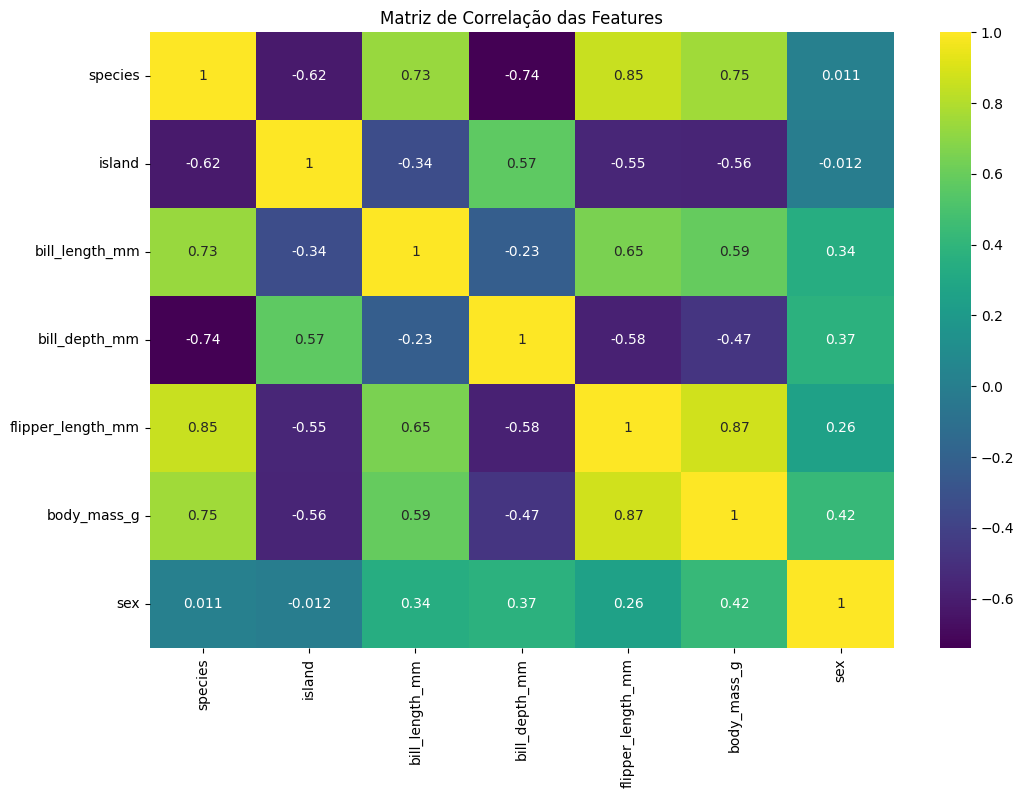

In [7]:
# Matriz de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(penguins_processed_df.corr(), annot=True, cmap='viridis')
plt.title('Matriz de Correlação das Features')
plt.show()

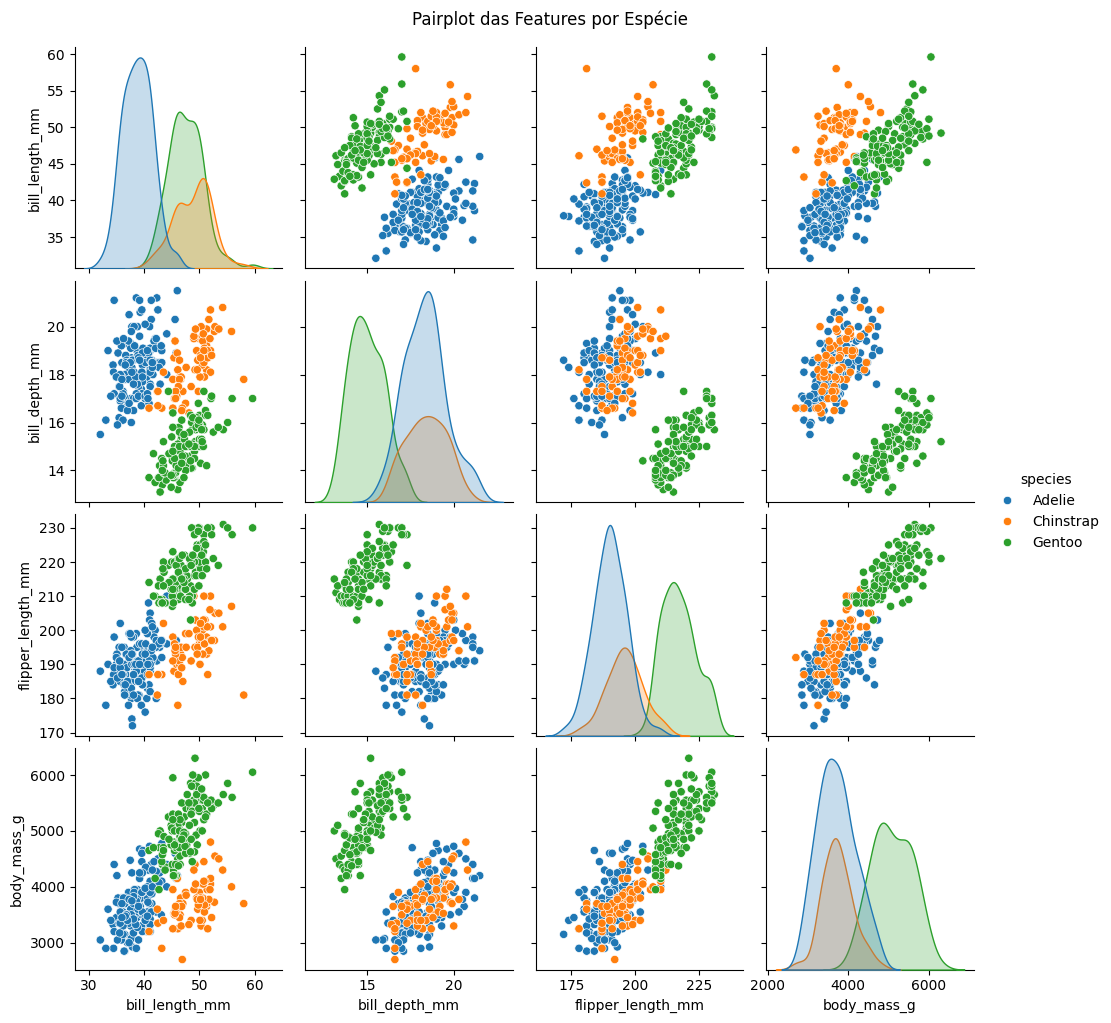

In [8]:
# Pairplot para visualizar a relação entre as variáveis
sns.pairplot(penguins_df, hue='species')
plt.suptitle('Pairplot das Features por Espécie', y=1.02)
plt.show()

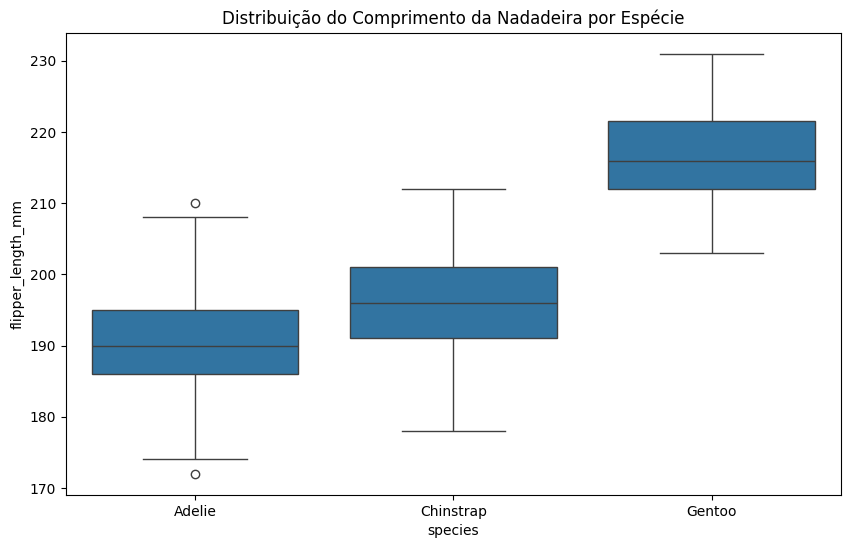

In [9]:
# Boxplot do comprimento da nadadeira por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_df)
plt.title('Distribuição do Comprimento da Nadadeira por Espécie')
plt.show()

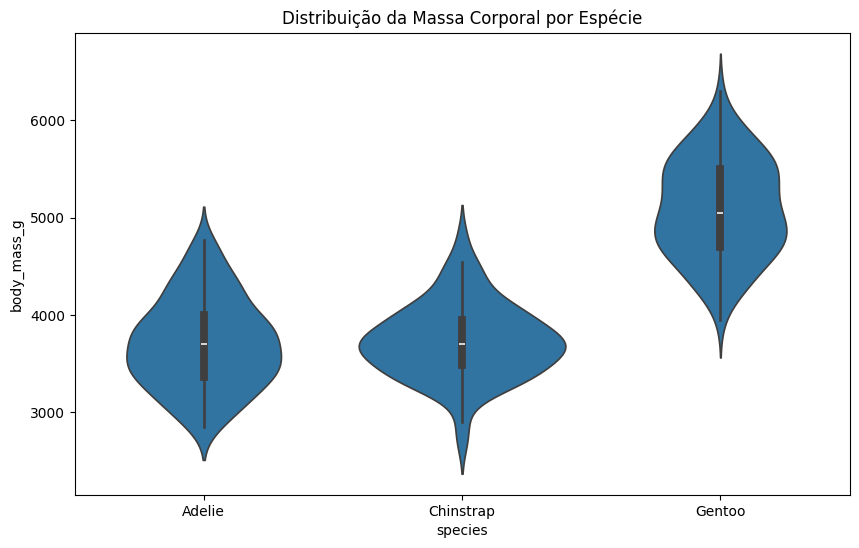

In [10]:
# Violin plot da massa corporal por espécie
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='body_mass_g', data=penguins_df)
plt.title('Distribuição da Massa Corporal por Espécie')
plt.show()

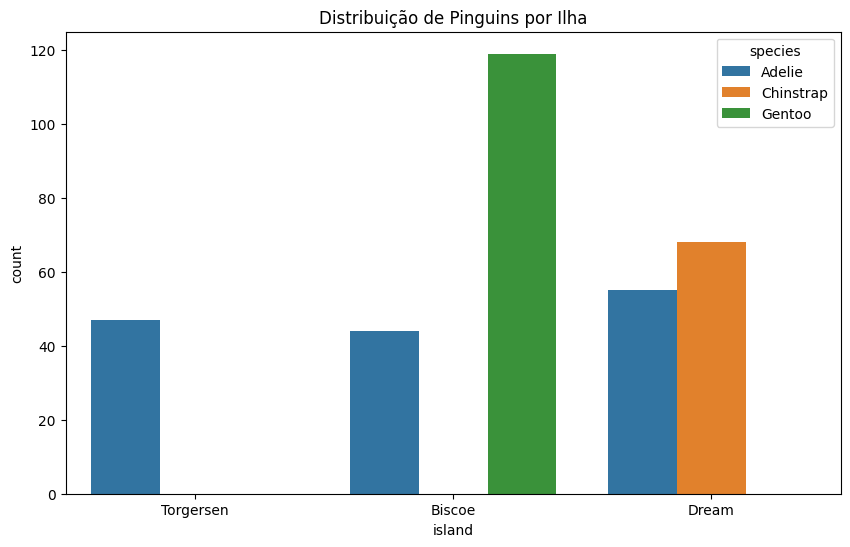

In [11]:
# Contagem de pinguins por ilha
plt.figure(figsize=(10, 6))
sns.countplot(x='island', data=penguins_df, hue='species')
plt.title('Distribuição de Pinguins por Ilha')
plt.show()

## Relatório da Análise

A análise exploratória do dataset de pinguins forneceu informações valiosas sobre as diferentes espécies e suas características físicas. A base de dados foi pré-processada para garantir a consistência dos dados, removendo valores ausentes e convertendo variáveis categóricas para um formato numérico para análise de correlação.

**Principais Observações:**
- A espécie de pinguim mais prevalente no conjunto de dados é a Adelie.
- Existe uma clara separação entre as espécies com base no comprimento e na profundidade do bico. Os pinguins Gentoo tendem a ter bicos mais longos e menos profundos, enquanto os pinguins Chinstrap e Adelie têm características de bico mais semelhantes.
- A matriz de correlação mostra uma forte correlação positiva entre o comprimento da nadadeira (`flipper_length_mm`) e a massa corporal (`body_mass_g`), e também entre o comprimento do bico (`bill_length_mm`) e o comprimento da nadadeira.
- Os gráficos de distribuição (boxplot e violin plot) confirmam que os pinguins Gentoo são geralmente maiores e mais pesados que as outras duas espécies.